In [17]:
# Import the dependencies.
# API KEY: d837b9a0363f8eb9404b5ab938c1f5c8

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [22]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d837b9a0363f8eb9404b5ab938c1f5c8


In [24]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(f"Total Number of cities: {len(city_data)}")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fasa
Processing Record 2 of Set 1 | souillac
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | sesvete
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | dunedin
Processing Record 9 of Set 1 | aldan
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | rungata
City not found. Skipping...
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | sotaquira
Processing Record 14 of Set 1 | saravan
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | wajir
Processing Record 17 of Set 1 | opochka
Processing Record 18 of Set 1 | dum duma
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | sola
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | v

Processing Record 38 of Set 4 | concordia
Processing Record 39 of Set 4 | canandaigua
Processing Record 40 of Set 4 | zaraza
Processing Record 41 of Set 4 | matay
Processing Record 42 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 43 of Set 4 | urdzhar
City not found. Skipping...
Processing Record 44 of Set 4 | oudtshoorn
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | mitsamiouli
Processing Record 47 of Set 4 | vila velha
Processing Record 48 of Set 4 | ijaki
City not found. Skipping...
Processing Record 49 of Set 4 | korla
Processing Record 50 of Set 4 | cidreira
Processing Record 1 of Set 5 | koson
Processing Record 2 of Set 5 | grand gaube
Processing Record 3 of Set 5 | nalut
Processing Record 4 of Set 5 | karamea
City not found. Skipping...
Processing Record 5 of Set 5 | demba
Processing Record 6 of Set 5 | dahuk
Processing Record 7 of Set 5 | santa rosa
Processing Record 8 of Set 5 | santa maria da boa vista
Processing Record 9 

Processing Record 21 of Set 8 | ucluelet
Processing Record 22 of Set 8 | powell river
Processing Record 23 of Set 8 | crab hill
City not found. Skipping...
Processing Record 24 of Set 8 | upernavik
Processing Record 25 of Set 8 | olafsvik
Processing Record 26 of Set 8 | champerico
Processing Record 27 of Set 8 | batangafo
Processing Record 28 of Set 8 | asau
Processing Record 29 of Set 8 | caravelas
Processing Record 30 of Set 8 | rio tuba
Processing Record 31 of Set 8 | pochutla
Processing Record 32 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 33 of Set 8 | cristalina
Processing Record 34 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 35 of Set 8 | kloulklubed
Processing Record 36 of Set 8 | san quintin
Processing Record 37 of Set 8 | bayangol
Processing Record 38 of Set 8 | sorvag
City not found. Skipping...
Processing Record 39 of Set 8 | tarakan
Processing Record 40 of Set 8 | linxia
Processing Record 41 of Set 8 | ust-ishim
Processing Reco

Processing Record 5 of Set 12 | moree
Processing Record 6 of Set 12 | merauke
Processing Record 7 of Set 12 | seoul
Processing Record 8 of Set 12 | mastic beach
Processing Record 9 of Set 12 | egvekinot
Processing Record 10 of Set 12 | baculin
Processing Record 11 of Set 12 | arlit
Processing Record 12 of Set 12 | bratsk
Processing Record 13 of Set 12 | ekibastuz
Processing Record 14 of Set 12 | maniitsoq
Processing Record 15 of Set 12 | suluq
Processing Record 16 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 17 of Set 12 | erzin
Processing Record 18 of Set 12 | vangaindrano
Processing Record 19 of Set 12 | jingdezhen
Processing Record 20 of Set 12 | taizhou
Processing Record 21 of Set 12 | alihe
Processing Record 22 of Set 12 | shelburne
Processing Record 23 of Set 12 | zeerust
Processing Record 24 of Set 12 | nyaunglebin
Processing Record 25 of Set 12 | tortoli
Processing Record 26 of Set 12 | iisalmi
Processing Record 27 of Set 12 | casablanca
Processing Recor

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

#Change the order of columns
new_column_order = ["City","Cloudiness","Country","Date","Humidity", "Lat","Lng","Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Fasa,0,IR,2021-12-03 03:33:16,70,28.9383,53.6482,40.24,4.61
1,Souillac,40,MU,2021-12-03 03:33:16,78,-20.5167,57.5167,81.36,11.50
2,Rikitea,6,PF,2021-12-03 03:33:17,76,-23.1203,-134.9692,76.35,18.50
3,Sesvete,0,HR,2021-12-03 03:33:17,89,45.8311,16.1164,39.29,6.91
4,Pevek,100,RU,2021-12-03 03:33:17,90,69.7008,170.3133,13.46,10.27
5,Bredasdorp,72,ZA,2021-12-03 03:33:17,88,-34.5322,20.0403,56.28,4.61
6,Ushuaia,40,AR,2021-12-03 03:29:26,66,-54.8000,-68.3000,46.06,16.11
7,Dunedin,89,NZ,2021-12-03 03:29:23,86,-45.8742,170.5036,63.25,8.93
8,Aldan,100,RU,2021-12-03 03:28:32,90,58.6031,125.3894,-13.20,5.97
9,Butaritari,14,KI,2021-12-03 03:33:18,72,3.0707,172.7902,82.06,11.50


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

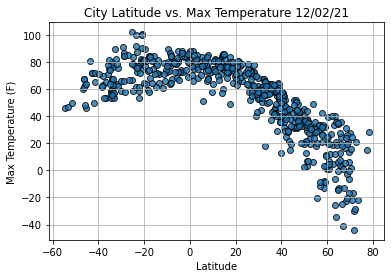

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

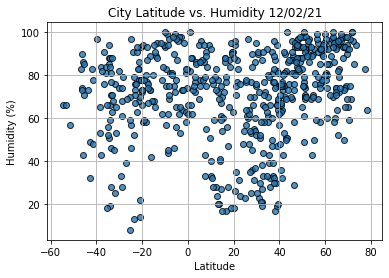

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

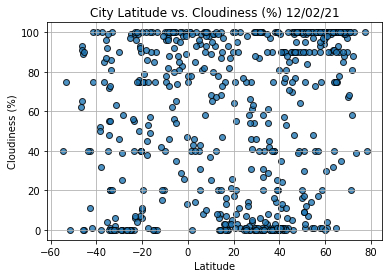

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

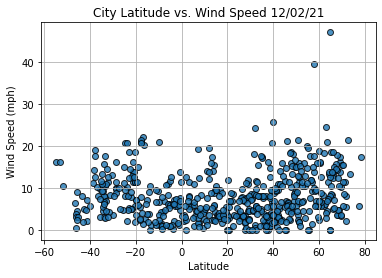

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [47]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Fasa,0,IR,2021-12-03 03:33:16,70,28.9383,53.6482,40.24,4.61
3,Sesvete,0,HR,2021-12-03 03:33:17,89,45.8311,16.1164,39.29,6.91
4,Pevek,100,RU,2021-12-03 03:33:17,90,69.7008,170.3133,13.46,10.27
8,Aldan,100,RU,2021-12-03 03:28:32,90,58.6031,125.3894,-13.20,5.97
9,Butaritari,14,KI,2021-12-03 03:33:18,72,3.0707,172.7902,82.06,11.50


In [48]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

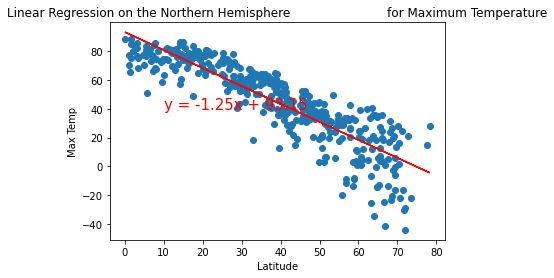

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

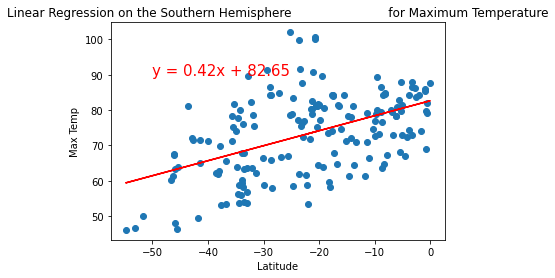

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

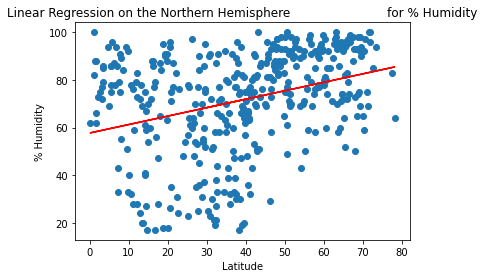

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

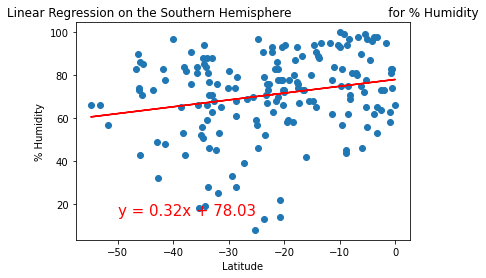

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

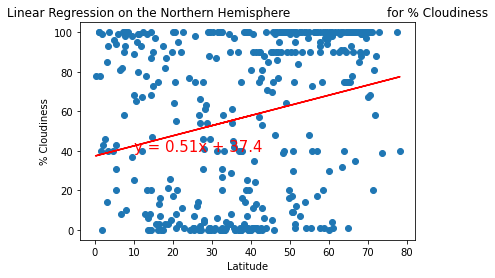

In [60]:
# SKILL DRILL

# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

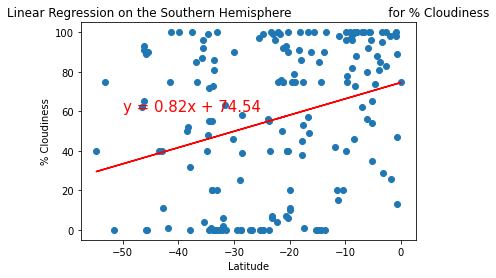

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

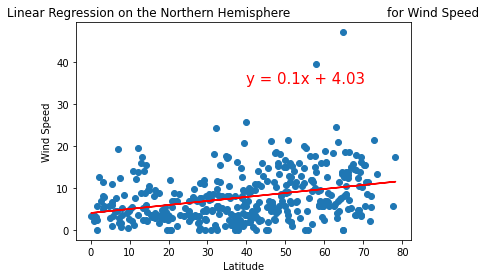

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

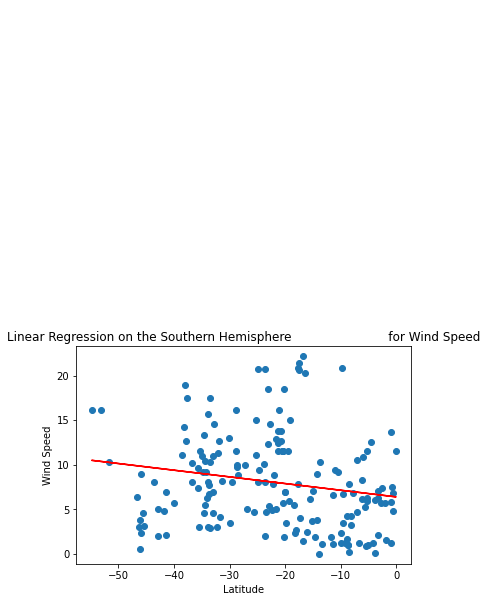

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,60))